 ** Sommaire **
 - <a href="#C1">1 - Régression Logistique</a>
     - <a href="#C2">    1.1 - Régression Logistique</a>
     - <a href="#C3">    1.2 - Regression Logistique avec FastTex</a>
     - <a href="#C4">    1.3 - Regression logistique avec GloVe</a>
 - <a href="#C5">2 - Modèle LSTM </a>
     - <a href="#C6">    2.1 - LSTM avec FastText </a>
     - <a href="#C7">    2.2 - LSTM avec FastText</a>
     - <a href="#C8">    2.3 - LSTM avec GloVe</a>
 - <a href="#C9">3 - Modèle BERT </a>
 - <a href="#C10">4 - Comparaison des models </a> 

In [2]:
#Importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

# Spécifiez le nouveau répertoire
new_directory = "/Users/aesseddiki/projet7"
# Changer le répertoire courant
os.chdir(new_directory)

# Vérifiez le répertoire courant après le changement
print(os.getcwd())

C:\Users\aesseddiki\projet7


In [4]:
data_echant = pd.read_csv("data_echant.csv", encoding='latin-1') 
print(data_echant.shape)

(158146, 2)


In [5]:
# Supprimer les lignes contenant des valeurs NaN dans data_echant
data_echant = data_echant.dropna()

# Afficher les premières lignes pour vérifier le nettoyage
data_echant.head()

,Etiquette,Tweet_corrige
0,4,han open book ask anything want hit ask away g...
1,4,take care hope see soon maybe next time perform
2,0,apparently magically worked time oh server boo...
3,4,almost perfect weekend perfect people love forest
4,4,rally also school drink milk


In [6]:
# Compter le nombre de lignes manquantes dans la colonne 'Tweet_corrige'
missing_values_count = data_echant['Tweet_corrige'].isna().sum()

# Afficher le nombre de lignes manquantes
print(f"Nombre de lignes manquantes dans 'Tweet_corrige' : {missing_values_count}")


Nombre de lignes manquantes dans 'Tweet_corrige' : 0


In [7]:
# Remplacer les modalités 4 par 1 dans la colonne "Etiquette"
data_echant['Etiquette'] = data_echant['Etiquette'].replace({4: 1})

In [8]:
# Échantillonner équitablement 5000 tweets dans data_echant, avec 5000 pour chaque modalité
data = pd.concat([
    data_echant[data_echant['Etiquette'] == 0].sample(n=5000, random_state=42),
    data_echant[data_echant['Etiquette'] == 1].sample(n=5000, random_state=42)
])

# Afficher le résultat pour vérification
data.head()


,Etiquette,Tweet_corrige
44353,0,huh who going showcase sure come anyways trip ...
60769,0,grandpa hospital day suck get better
92787,0,know kept saying hour going corner sit traffic...
119851,0,sophomore g wan na go c f
86450,0,sad coz sad


In [9]:
data.shape

(10000, 2)

## <a name="C1">1 - Régression Logistique</a>

#### <a name="C2">1.1 - Regression Logistique</a>

In [12]:
import mlflow
import mlflow.sklearn

Matrice de confusion :
 [[694 318]
 [249 739]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.74      0.69      0.71      1012
           1       0.70      0.75      0.72       988

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



2025/02/18 17:08:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/18 17:08:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression Model at: http://127.0.0.1:5000/#/experiments/0/runs/27f6ccdd83f242528946de8bfbc02b01.
2025/02/18 17:08:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


L'expérience MLflow est enregistrée avec succès.


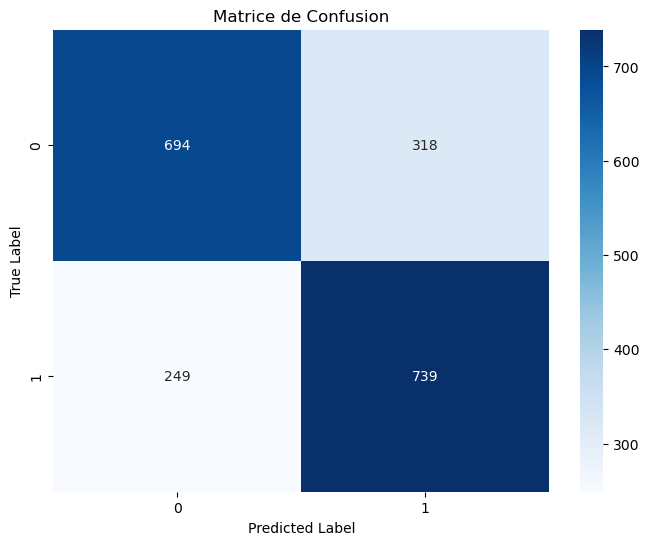

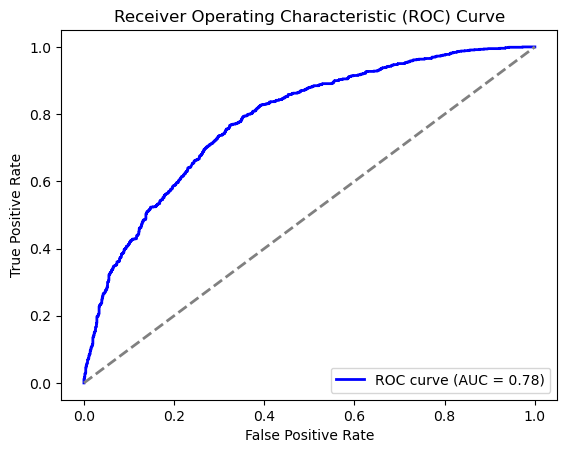

In [13]:
import mlflow
import mlflow.sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer l'URI de suivi MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Séparer les caractéristiques (X) et la variable cible (y)
X = data['Tweet_corrige']
y = data['Etiquette']

# Utiliser CountVectorizer pour transformer les tweets en vecteurs numériques
vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Créer l'instance du modèle
model = LogisticRegression()

# Démarrer une nouvelle session d'expérience MLflow avec un nom pour le modèle
with mlflow.start_run(run_name="Logistic Regression Model"):
    
    # Entraîner le modèle sur les données d'entraînement
    model.fit(X_train, y_train)
    
    # Prédire les valeurs et obtenir les probabilités sur les données de test
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive (classe 1)

    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Matrice de confusion :\n", conf_matrix)

    # Afficher le rapport de classification
    report = classification_report(y_test, y_pred)
    print("\nRapport de classification :\n", report)
    
    # Calculer les métriques d'évaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # Calcul de la courbe ROC et de l'AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Enregistrer les paramètres du modèle
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_param("vectorizer", "CountVectorizer")
    
    # Enregistrer les métriques
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("auc", roc_auc)
    
    # Enregistrer la matrice de confusion sous forme d'image
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
    plt.title("Matrice de Confusion")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    # Tracer la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")
    
    # Enregistrer le modèle
    mlflow.sklearn.log_model(model, "model")

    # Optionnel : afficher un message de fin de session
    print("L'expérience MLflow est enregistrée avec succès.")


Entraînez un modèle FastText pour créer des vecteurs de mots, et les utiliser pour transformer les tweets en vecteurs, puis appliquez une régression logistique pour prédire les étiquettes sur les données de test.

## <a name="C3">1.2 - Regression Logistique avec FastTex </a>

Matrice de confusion :
                 Predicted Negatif  Predicted Positif
Actual Negatif                671                866
Actual Positif                419               1044

Rapport de classification :
               precision    recall  f1-score   support

           0       0.62      0.44      0.51      1537
           1       0.55      0.71      0.62      1463

    accuracy                           0.57      3000
   macro avg       0.58      0.58      0.56      3000
weighted avg       0.58      0.57      0.56      3000



2025/02/18 17:08:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/18 17:08:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression Model with FastText at: http://127.0.0.1:5000/#/experiments/0/runs/a7ad7bda4b1649c69232dd8d47085ab1.
2025/02/18 17:08:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


L'expérience MLflow est enregistrée avec succès.


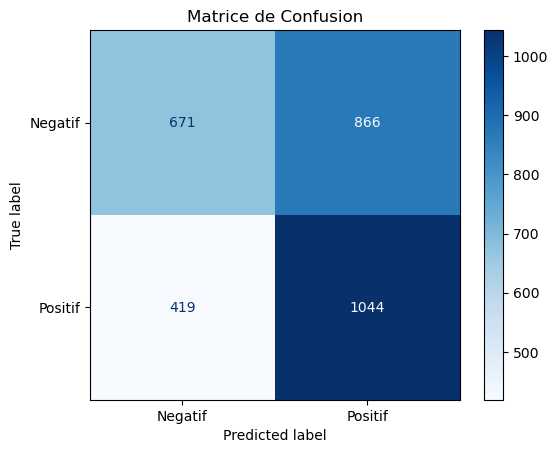

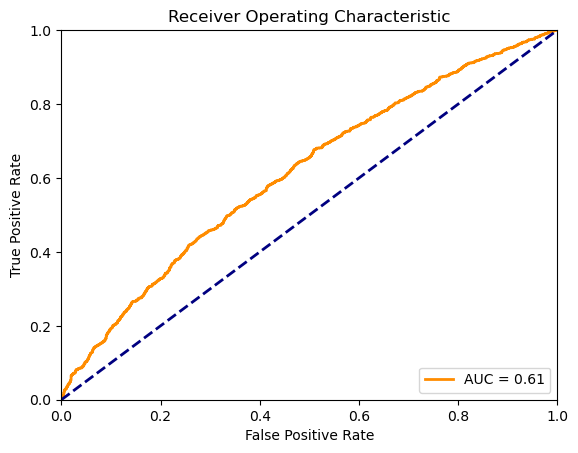

In [16]:
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models import FastText
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns

# Configurer l'URI de suivi MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Charger les tweets et préparer les données pour FastText
with open("tweets.txt", "w", encoding="utf-8") as f:
    for tweet in data['Tweet_corrige'].dropna():
        f.write(tweet + "\n")

with open("tweets.txt", "r", encoding="utf-8") as f:
    sentences = [line.strip().split() for line in f]

# Entraîner le modèle FastText
model = FastText(sentences, vector_size=100, window=5, min_count=1, sg=1)

# Fonction pour obtenir les vecteurs FastText d'un texte
def get_fasttext_vector(text, model):
    tokens = text.split()
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros((100,))

# Obtenir les vecteurs pour chaque tweet
X_vect = np.array([get_fasttext_vector(tweet, model) for tweet in data['Tweet_corrige'].dropna()])
y = data['Etiquette'].dropna().values

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.3, random_state=42)

# Créer l'instance du modèle de régression logistique
model_logistic = LogisticRegression()

# Démarrer une nouvelle session d'expérience MLflow avec un nom spécifique pour le modèle
with mlflow.start_run(run_name="Logistic Regression Model with FastText"):
    
    # Entraîner le modèle de régression logistique
    model_logistic.fit(X_train, y_train)
    
    # Prédire les valeurs sur les données de test
    y_pred = model_logistic.predict(X_test)
    
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negatif', 'Actual Positif'], columns=['Predicted Negatif', 'Predicted Positif'])
    print("Matrice de confusion :\n", conf_matrix_df)

    # Afficher le rapport de classification
    report = classification_report(y_test, y_pred)
    print("\nRapport de classification :\n", report)
    
    # Calculer les métriques d'évaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # Calculer la courbe ROC et l'AUC
    y_prob = model_logistic.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Enregistrer les paramètres du modèle
    mlflow.log_param("embedding", "FastText")
    mlflow.log_param("vector_size", 100)
    
    # Enregistrer les métriques
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("auc", roc_auc)
    
    # Enregistrer la matrice de confusion sous forme de graphique
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negatif', 'Positif'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Matrice de Confusion")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    # Tracer la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")
    
    # Enregistrer le modèle de régression logistique
    mlflow.sklearn.log_model(model_logistic, "model")

    print("L'expérience MLflow est enregistrée avec succès.")


#### <a name="C4">1.3 - Glove</a>

## <a name="C4">1.3 - Regression logistique avec GloVe</a>

Matrice de confusion :
                 Predicted Negatif  Predicted Positif
Actual Negatif               1060                477
Actual Positif                443               1020

Rapport de classification :
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      1537
           1       0.68      0.70      0.69      1463

    accuracy                           0.69      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.69      0.69      0.69      3000



2025/02/18 17:09:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/18 17:09:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression Logistique Model with GloVe at: http://127.0.0.1:5000/#/experiments/784209625995340563/runs/a566c4e60f6340f3959f69d02ab82409.
2025/02/18 17:09:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/784209625995340563.


L'expérience MLflow est enregistrée avec succès.


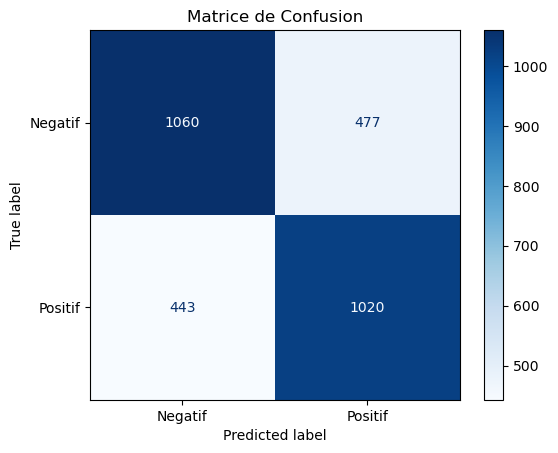

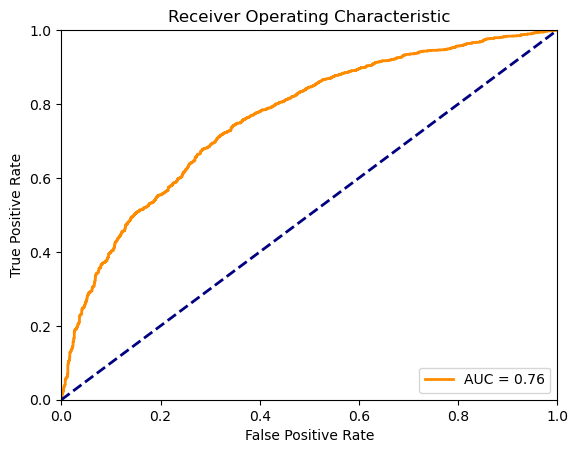

In [19]:
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Configurer l'URI de suivi et le nom de l'expérience dans MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Régression Logistique avec GloVe")

# Fonction pour charger les vecteurs GloVe
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Charger les embeddings GloVe
glove_file_path = '/Users/aesseddiki/glove.6B.100d.txt'  # Chemin complet vers le fichier
glove_embeddings = load_glove_embeddings(glove_file_path)

# Fonction pour obtenir le vecteur moyen GloVe d'un texte
def get_average_glove_vector(tokens_list, embeddings, vector_size):
    return np.mean([embeddings.get(token, np.zeros(vector_size)) for token in tokens_list], axis=0)

# Appliquer les embeddings GloVe aux tweets
data.loc[:, 'Tweet_corrige_tokenized'] = data['Tweet_corrige'].apply(lambda x: x.split())
X_glove = np.array([get_average_glove_vector(tweet, glove_embeddings, 100) for tweet in data['Tweet_corrige_tokenized']])
y = data['Etiquette']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_glove, y, test_size=0.3, random_state=42)

# Créer l'instance du modèle de régression logistique
model = LogisticRegression()

# Démarrer une nouvelle session d'expérience MLflow avec un nom spécifique pour le modèle
with mlflow.start_run(run_name="Logistic Regression Logistique Model with GloVe"):
    
    # Entraîner le modèle de régression logistique
    model.fit(X_train, y_train)
    
    # Prédire les valeurs sur les données de test
    y_pred = model.predict(X_test)
    
    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negatif', 'Actual Positif'], columns=['Predicted Negatif', 'Predicted Positif'])
    print("Matrice de confusion :\n", conf_matrix_df)

    # Afficher le rapport de classification
    report = classification_report(y_test, y_pred)
    print("\nRapport de classification :\n", report)
    
    # Calculer les métriques d'évaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # Calculer la courbe ROC et l'AUC
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Enregistrer les paramètres du modèle
    mlflow.log_param("embedding", "GloVe")
    mlflow.log_param("vector_size", 100)
    
    # Enregistrer les métriques
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("auc", roc_auc)
    
    # Enregistrer la matrice de confusion sous forme de graphique
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negatif', 'Positif'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Matrice de Confusion")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    # Tracer la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")
    
    # Enregistrer le modèle de régression logistique
    mlflow.sklearn.log_model(model, "model")

    print("L'expérience MLflow est enregistrée avec succès.")


## <a name="C5">2 - Modèle LSTM(Long Short-Term Memory)</a>

### <a name="C6">2.1 -LSTM avec PyTorch Embeddings </a>

Epoch 1/10, Loss: 0.6951392074993679
Epoch 2/10, Loss: 0.6939752311706543
Epoch 3/10, Loss: 0.6932807944161551
Epoch 4/10, Loss: 0.6527180183955601
Epoch 5/10, Loss: 0.5524539150340216
Epoch 6/10, Loss: 0.48743397333792277
Epoch 7/10, Loss: 0.4344155294639724
Epoch 8/10, Loss: 0.37975037632243974
Epoch 9/10, Loss: 0.3307738285277571
Epoch 10/10, Loss: 0.2904748317428998

Rapport de classification :
               precision    recall  f1-score   support

    Classe 0       0.68      0.68      0.68      1537
    Classe 1       0.66      0.66      0.66      1463

    accuracy                           0.67      3000
   macro avg       0.67      0.67      0.67      3000
weighted avg       0.67      0.67      0.67      3000



2025/02/18 17:10:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/18 17:10:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run LSTM Model with PyTorch Embeddings at: http://127.0.0.1:5000/#/experiments/888164383877306528/runs/fc45627ed1b44a14b6985020861cba79.
2025/02/18 17:10:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/888164383877306528.


L'expérience MLflow est enregistrée avec succès.


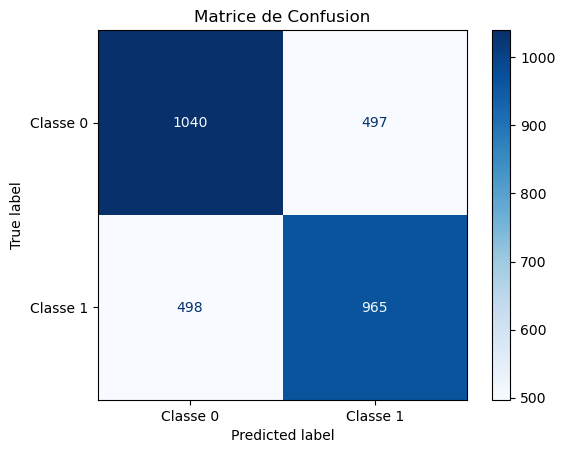

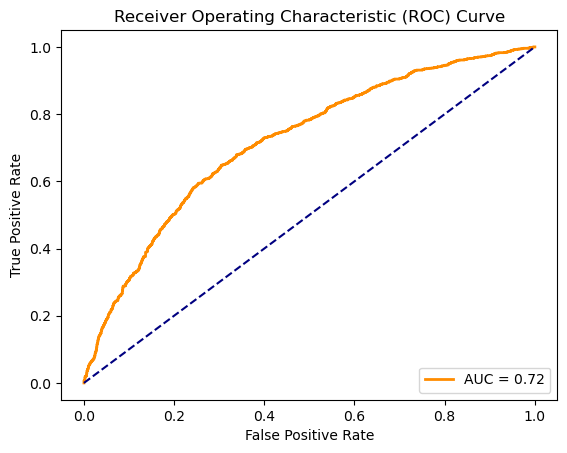

In [22]:
import mlflow
import mlflow.pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Configurer l'URI de suivi et nommer l'expérience dans MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("LSTM avec PyTorch")

# Préparer le vocabulaire et tokenisation simplifiée
def simple_tokenizer(text, vocab):
    return [vocab.get(word, vocab["[UNK]"]) for word in text.lower().split()]

# Construire un vocabulaire simple à partir des tweets
vocab = {"[PAD]": 0, "[UNK]": 1}
for tweet in data['Tweet_corrige']:
    for word in tweet.lower().split():
        if word not in vocab:
            vocab[word] = len(vocab)

# Diviser les données en ensembles d'entraînement et de test
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Transformer les phrases en tokens pré-traités
class TextDataset(Dataset):
    def __init__(self, dataframe, vocab):
        self.data = dataframe
        self.vocab = vocab
        self.inputs = [
            simple_tokenizer(text, self.vocab)[:20] + [0] * (20 - len(text.split())) 
            for text in dataframe['Tweet_corrige']
        ]
        self.labels = torch.tensor(dataframe['Etiquette'].values)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return torch.tensor(self.inputs[idx]), self.labels[idx]

# Créer les DataLoaders pour l'entraînement et le test
train_dataset = TextDataset(train_data, vocab)
test_dataset = TextDataset(test_data, vocab)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Définir le modèle LSTM pour la classification de texte
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        final_feature_map = lstm_out[:, -1, :]  # Dernière sortie de LSTM
        out = self.fc(final_feature_map)
        return out

# Initialiser le modèle, la fonction de perte et l'optimiseur
vocab_size = len(vocab)
embed_size = 64  
hidden_size = 64  
output_size = 2
learning_rate = 0.0005
num_epochs = 10

model = LSTMClassifier(vocab_size, embed_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Démarrer une nouvelle session d'expérience MLflow avec un nom pour le modèle
with mlflow.start_run(run_name="LSTM Model with PyTorch Embeddings"):
    
    # Enregistrer les paramètres dans MLflow
    mlflow.log_param("vocab_size", vocab_size)
    mlflow.log_param("embed_size", embed_size)
    mlflow.log_param("hidden_size", hidden_size)
    mlflow.log_param("output_size", output_size)
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("num_epochs", num_epochs)

    # Entraîner le modèle
    for epoch in range(num_epochs):
        running_loss = 0.0
        model.train()
        for inputs, labels in train_dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # Calculer et enregistrer la perte moyenne de l'époque
        avg_loss = running_loss / len(train_dataloader)
        mlflow.log_metric("train_loss", avg_loss, step=epoch)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}")

    # Évaluation sur l'ensemble de test
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            probs = nn.functional.softmax(outputs, dim=1)[:, 1]  # Probabilités pour la classe positive
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    # Calcul des métriques d'évaluation
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average="weighted")
    recall = recall_score(all_labels, all_preds, average="weighted")
    f1 = f1_score(all_labels, all_preds, average="weighted")

    # Calcul de l'AUC
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    roc_auc = auc(fpr, tpr)
    
    # Enregistrer les métriques dans MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("auc", roc_auc)
    
    # Générer le rapport de classification
    report = classification_report(all_labels, all_preds, target_names=['Classe 0', 'Classe 1'])
    print("\nRapport de classification :\n", report)
    mlflow.log_text(report, "classification_report.txt")

    # Calculer et enregistrer la matrice de confusion
    conf_matrix = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Classe 0', 'Classe 1'])
    disp.plot(cmap="Blues")
    plt.title("Matrice de Confusion")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    # Tracer et enregistrer la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")

    # Enregistrer le modèle dans MLflow
    mlflow.pytorch.log_model(model, "model")

    print("L'expérience MLflow est enregistrée avec succès.")


### <a name="C7">2.2 - LSTM avec FastText </a>

Epoch 1/10, Loss: 0.6926703053951263
Epoch 2/10, Loss: 0.6923166772842407
Epoch 3/10, Loss: 0.6917947706222534
Epoch 4/10, Loss: 0.6916328858375549
Epoch 5/10, Loss: 0.6908105172634125
Epoch 6/10, Loss: 0.6907600788116455
Epoch 7/10, Loss: 0.6904839968681336
Epoch 8/10, Loss: 0.6898555420398712
Epoch 9/10, Loss: 0.6868691784858704
Epoch 10/10, Loss: 0.6855190216064453
Rapport de classification :
               precision    recall  f1-score   support

    Classe 0       0.58      0.48      0.53      5000
    Classe 1       0.55      0.64      0.60      5000

    accuracy                           0.56     10000
   macro avg       0.57      0.56      0.56     10000
weighted avg       0.57      0.56      0.56     10000



2025/02/18 17:11:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/18 17:11:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run LSTM avec FastText at: http://127.0.0.1:5000/#/experiments/138246521145536532/runs/a6c2095f46d749a58aae247af0c42f6c.
2025/02/18 17:11:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/138246521145536532.


L'expérience MLflow est enregistrée avec succès.


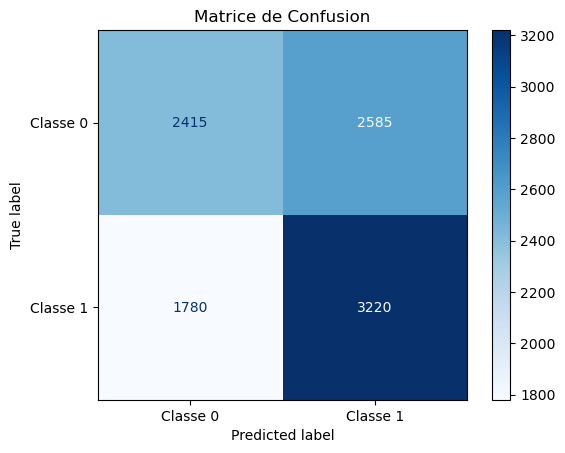

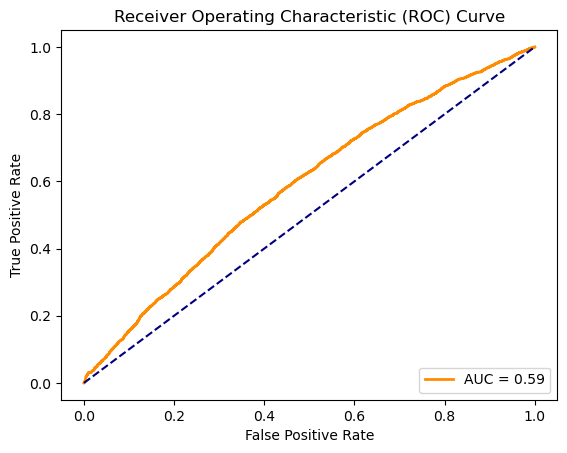

In [24]:
import mlflow
import mlflow.pytorch
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from gensim.models import FastText
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Configurer l'URI de suivi et nommer l'expérience dans MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("LSTM avec FastText")

# Charger les tweets et les tokeniser
with open("tweets.txt", "r", encoding="utf-8") as f:
    sentences = [line.strip().split() for line in f]

# Entraîner le modèle FastText
fasttext_model = FastText(sentences, vector_size=64, window=5, min_count=1, sg=1)
embed_size = fasttext_model.vector_size

# Construire le vocabulaire et la matrice d'embeddings à partir du modèle FastText
vocab = {"[PAD]": 0, "[UNK]": 1}
embedding_matrix = [np.zeros(embed_size), np.mean(fasttext_model.wv.vectors, axis=0)]

for word in fasttext_model.wv.index_to_key:
    vocab[word] = len(vocab)
    embedding_matrix.append(fasttext_model.wv[word])

embedding_matrix = np.array(embedding_matrix)
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float)

# Tokenizer simple pour transformer les tweets en indices
def simple_tokenizer(text, vocab):
    return [vocab.get(word, vocab["[UNK]"]) for word in text.lower().split()]

# Définir le Dataset pour charger les données
class TextDataset(Dataset):
    def __init__(self, dataframe, vocab):
        self.data = dataframe
        self.vocab = vocab
        self.inputs = [
            simple_tokenizer(text, self.vocab)[:20] + [0] * (20 - len(text.split())) 
            for text in dataframe['Tweet_corrige']
        ]
        self.labels = torch.tensor(dataframe['Etiquette'].values)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return torch.tensor(self.inputs[idx]), self.labels[idx]

# Créer le DataLoader
dataset = TextDataset(data, vocab)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Définir le modèle LSTM pour la classification de texte
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size):
        super(LSTMClassifier, self).__init__()
        num_embeddings, embed_size = embedding_matrix.shape
        self.embedding = nn.Embedding(num_embeddings, embed_size)
        self.embedding.weight = nn.Parameter(embedding_matrix)  # Initialiser avec FastText
        self.embedding.weight.requires_grad = False  # Geler les embeddings
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        final_feature_map = lstm_out[:, -1, :]
        out = self.fc(final_feature_map)
        return out

# Initialiser les paramètres du modèle
hidden_size = 64  
output_size = 2
learning_rate = 0.0005
num_epochs = 10

# Initialiser le modèle, la fonction de perte et l'optimiseur
model = LSTMClassifier(embedding_matrix, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)

# Démarrer une nouvelle session d'expérience MLflow avec un nom d'exécution
with mlflow.start_run(run_name="LSTM avec FastText"):
    
    # Enregistrer les paramètres du modèle dans MLflow
    mlflow.log_param("embedding", "FastText")
    mlflow.log_param("embed_size", embed_size)
    mlflow.log_param("hidden_size", hidden_size)
    mlflow.log_param("output_size", output_size)
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("num_epochs", num_epochs)

    # Entraîner le modèle
    for epoch in range(num_epochs):
        running_loss = 0.0
        model.train()
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # Calculer la perte moyenne et l'enregistrer dans MLflow
        avg_loss = running_loss / len(dataloader)
        mlflow.log_metric("loss", avg_loss, step=epoch)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}")

    # Mettre le modèle en mode évaluation
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            probs = nn.functional.softmax(outputs, dim=1)[:, 1]  # Probabilités pour la classe positive
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    # Calcul des métriques d'évaluation
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average="weighted")
    recall = recall_score(all_labels, all_preds, average="weighted")
    f1 = f1_score(all_labels, all_preds, average="weighted")

    # Calcul de l'AUC
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    roc_auc = auc(fpr, tpr)
    
    # Enregistrer les métriques dans MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("auc", roc_auc)
    
    # Générer le rapport de classification
    report = classification_report(all_labels, all_preds, target_names=['Classe 0', 'Classe 1'])
    print("Rapport de classification :\n", report)
    mlflow.log_text(report, "classification_report.txt")

    # Calculer et enregistrer la matrice de confusion
    conf_matrix = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Classe 0', 'Classe 1'])
    disp.plot(cmap="Blues")
    plt.title("Matrice de Confusion")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    # Tracer et enregistrer la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")

    # Enregistrer le modèle dans MLflow
    mlflow.pytorch.log_model(model, "model")

    print("L'expérience MLflow est enregistrée avec succès.")


## <a name="C8">2.3 - LSTM avec GloVe </a>

##### Définir le Modèle LSTM avec Embeddings GloVe

Epoch 1/10, Loss: 0.6701660293510981
Epoch 2/10, Loss: 0.6079067279951913
Epoch 3/10, Loss: 0.581772706423487
Epoch 4/10, Loss: 0.5606910887445722
Epoch 5/10, Loss: 0.5465880084037781
Epoch 6/10, Loss: 0.5303064907959529
Epoch 7/10, Loss: 0.5079846351572446
Epoch 8/10, Loss: 0.48907977769204547
Epoch 9/10, Loss: 0.4672830354486193
Epoch 10/10, Loss: 0.443517538862569
Rapport de classification :
               precision    recall  f1-score   support

    Classe 0       0.68      0.80      0.73      1537
    Classe 1       0.74      0.61      0.67      1463

    accuracy                           0.70      3000
   macro avg       0.71      0.70      0.70      3000
weighted avg       0.71      0.70      0.70      3000



2025/02/18 17:12:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/18 17:12:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run LSTM Model with GloVe at: http://127.0.0.1:5000/#/experiments/432947481211278854/runs/81f51ee5adb4416db3bde740ec48df8b.
2025/02/18 17:12:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/432947481211278854.


L'expérience MLflow est enregistrée avec succès.


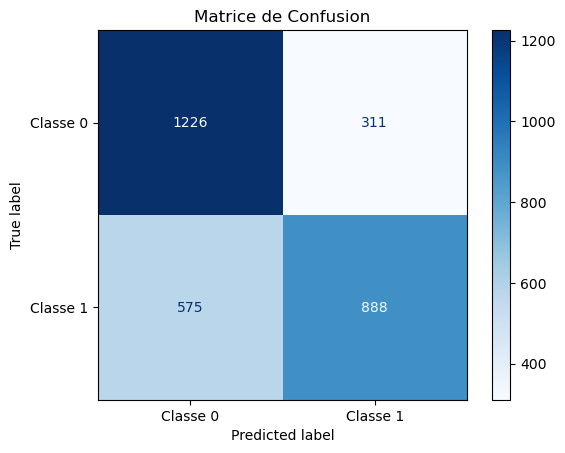

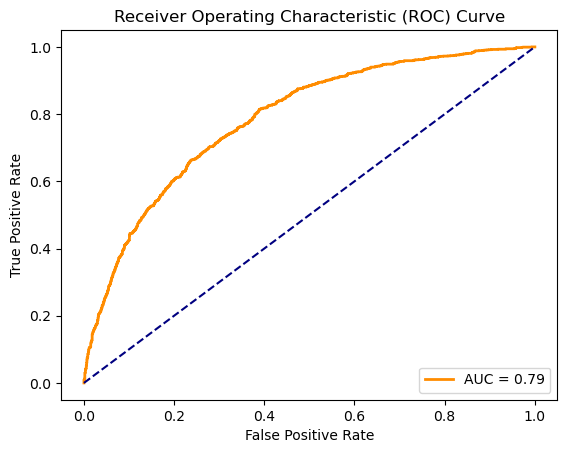

In [27]:
import mlflow
import mlflow.pytorch
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Configurer l'URI de suivi et nommer l'expérience dans MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("LSTM avec GloVe")

# Charger les vecteurs GloVe dans un dictionnaire
embedding_dict = {}
embed_size = 100

with open("/Users/aesseddiki/glove.6B.100d.txt", "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embedding_dict[word] = coefs

# Construire le vocabulaire et la matrice d'embeddings à partir des vecteurs GloVe
vocab = {"[PAD]": 0, "[UNK]": 1}
embedding_matrix = [np.zeros(embed_size), np.random.normal(size=(embed_size,))]

for tweet in data['Tweet_corrige']:
    for word in tweet.lower().split():
        if word not in vocab:
            vocab[word] = len(vocab)
            embedding_matrix.append(embedding_dict.get(word, np.random.normal(size=(embed_size,))))

embedding_matrix = np.array(embedding_matrix)
embedding_matrix = torch.tensor(embedding_matrix, dtype=torch.float)

# Tokenizer simple pour transformer les tweets en indices
def simple_tokenizer(text, vocab):
    return [vocab.get(word, vocab["[UNK]"]) for word in text.lower().split()]

# Diviser les données en ensembles d'entraînement et de test
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Dataset pour charger les données
class TextDataset(Dataset):
    def __init__(self, dataframe, vocab):
        self.data = dataframe
        self.vocab = vocab
        self.inputs = [
            simple_tokenizer(text, self.vocab)[:20] + [0] * (20 - len(text.split())) 
            for text in dataframe['Tweet_corrige']
        ]
        self.labels = torch.tensor(dataframe['Etiquette'].values)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return torch.tensor(self.inputs[idx]), self.labels[idx]

# Créer les DataLoaders pour l'entraînement et le test
train_dataset = TextDataset(train_data, vocab)
test_dataset = TextDataset(test_data, vocab)
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Définir le modèle LSTM pour la classification de texte
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_matrix, hidden_size, output_size):
        super(LSTMClassifier, self).__init__()
        num_embeddings, embed_size = embedding_matrix.shape
        self.embedding = nn.Embedding(num_embeddings, embed_size)
        self.embedding.weight = nn.Parameter(embedding_matrix)  # Initialiser avec GloVe
        self.embedding.weight.requires_grad = False  # Geler les embeddings
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        final_feature_map = lstm_out[:, -1, :]
        out = self.fc(final_feature_map)
        return out

# Initialiser les paramètres du modèle
hidden_size = 64  
output_size = 2
learning_rate = 0.0005
num_epochs = 10

# Initialiser le modèle, la fonction de perte et l'optimiseur
model = LSTMClassifier(embedding_matrix, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)

# Démarrer une nouvelle session d'expérience MLflow avec un nom pour le modèle
with mlflow.start_run(run_name="LSTM Model with GloVe"):
    
    # Enregistrer les paramètres dans MLflow
    mlflow.log_param("embed_size", embed_size)
    mlflow.log_param("hidden_size", hidden_size)
    mlflow.log_param("output_size", output_size)
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("num_epochs", num_epochs)

    # Entraîner le modèle
    for epoch in range(num_epochs):
        running_loss = 0.0
        model.train()
        for inputs, labels in train_dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # Calculer la perte moyenne et l'enregistrer dans MLflow
        avg_loss = running_loss / len(train_dataloader)
        mlflow.log_metric("train_loss", avg_loss, step=epoch)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}")

    # Évaluation sur l'ensemble de test
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Obtenir les probabilités
            preds = torch.argmax(probs, dim=1)
            
            all_probs.extend(probs[:, 1].cpu().numpy())  # Probabilités pour la classe 1
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calcul des métriques d'évaluation
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average="weighted")
    recall = recall_score(all_labels, all_preds, average="weighted")
    f1 = f1_score(all_labels, all_preds, average="weighted")

    # Calcul de l'AUC
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    roc_auc = auc(fpr, tpr)

    # Enregistrer les métriques dans MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("auc", roc_auc)
    
    # Générer le rapport de classification
    report = classification_report(all_labels, all_preds, target_names=['Classe 0', 'Classe 1'])
    print("Rapport de classification :\n", report)
    mlflow.log_text(report, "classification_report.txt")

    # Calculer et enregistrer la matrice de confusion
    conf_matrix = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Classe 0', 'Classe 1'])
    disp.plot(cmap="Blues")
    plt.title("Matrice de Confusion")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    
    # Tracer et enregistrer la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")

    # Enregistrer le modèle dans MLflow
    mlflow.pytorch.log_model(model, "model")

    print("L'expérience MLflow est enregistrée avec succès.")


### <a name="C9">3 - Modèle BERT</a>

##### Importer les Bibliothèques Nécessaires et Charger le Modèle et le Tokenizer

#### Créer un modèle BERT pour la classification

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4


Training: 100%|██████████| 500/500 [19:47<00:00,  2.38s/it]


Average Loss for Epoch 1: 0.5925791795253754
Epoch 2/4


Training: 100%|██████████| 500/500 [27:35<00:00,  3.31s/it]   


Average Loss for Epoch 2: 0.47533609437942503
Epoch 3/4


Training: 100%|██████████| 500/500 [19:20<00:00,  2.32s/it]


Average Loss for Epoch 3: 0.3717041192501783
Epoch 4/4


Training: 100%|██████████| 500/500 [14:20:46<00:00, 103.29s/it]     


Average Loss for Epoch 4: 0.27192801087349655
Rapport de classification :
               precision    recall  f1-score   support

    Classe 0       0.74      0.75      0.75      1012
    Classe 1       0.74      0.73      0.74       988

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



2025/02/19 08:42:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/19 08:42:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run clumsy-hare-182 at: http://127.0.0.1:5000/#/experiments/545283090435535544/runs/9f994ac188a24dcb81a01c254063cacb.
2025/02/19 08:42:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/545283090435535544.


L'expérience MLflow est enregistrée avec succès.


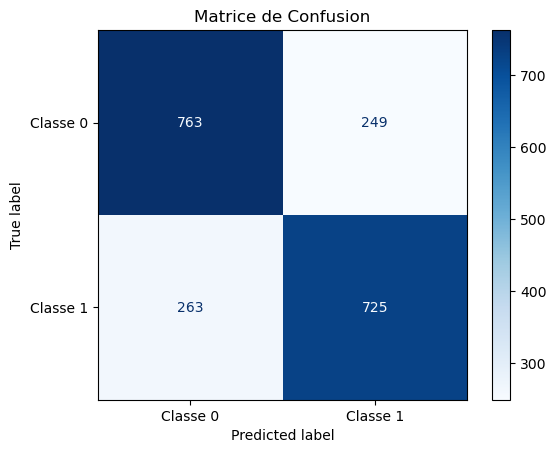

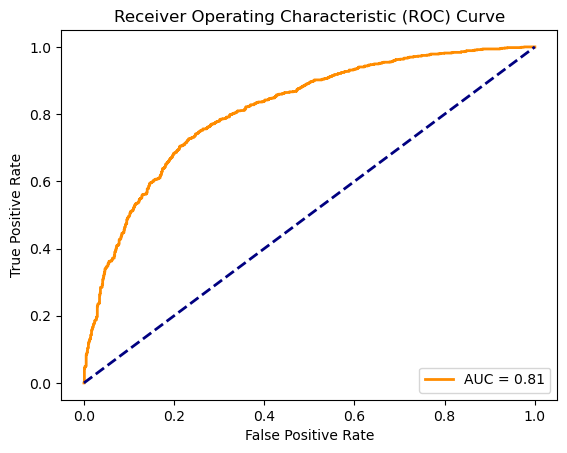

In [31]:
import mlflow
import mlflow.pytorch
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split

# Configuration de MLflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Classification avec BERT")

# Charger le tokenizer et le modèle BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Déplacer le modèle sur le GPU si disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Diviser les données
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Préparation des données d'entraînement et de test
def preprocess_data(data, tokenizer):
    data = data.dropna(subset=['Tweet_corrige', 'Etiquette'])
    data['Etiquette'] = data['Etiquette'].astype(int)
    encoded_data = tokenizer(
        data['Tweet_corrige'].tolist(),
        padding=True,
        truncation=True,
        max_length=64,
        return_tensors='pt'
    )
    input_ids = encoded_data['input_ids']
    attention_masks = encoded_data['attention_mask']
    labels = torch.tensor(data['Etiquette'].tolist())
    return TensorDataset(input_ids, attention_masks, labels)

train_dataset = preprocess_data(train_data, tokenizer)
test_dataset = preprocess_data(test_data, tokenizer)

train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=16)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=16)

# Initialisation de l'optimiseur et du scheduler
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(), lr=2e-5)
epochs = 4
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Enregistrement de l'entraînement et de l'évaluation avec MLflow
with mlflow.start_run():
    # Enregistrer les hyperparamètres dans MLflow
    mlflow.log_param("learning_rate", 2e-5)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("batch_size", 16)

    # Entraînement du modèle
    model.train()
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        total_loss = 0

        for batch in tqdm(train_dataloader, desc="Training"):
            batch_input_ids, batch_attention_masks, batch_labels = [b.to(device) for b in batch]
            optimizer.zero_grad()
            outputs = model(
                input_ids=batch_input_ids,
                attention_mask=batch_attention_masks,
                labels=batch_labels
            )
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            scheduler.step()

        avg_loss = total_loss / len(train_dataloader)
        mlflow.log_metric("train_loss", avg_loss, step=epoch)
        print(f"Average Loss for Epoch {epoch + 1}: {avg_loss}")

    # Évaluation du modèle
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for batch in test_dataloader:
            batch_input_ids, batch_attention_masks, batch_labels = [b.to(device) for b in batch]
            outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_masks)
            logits = outputs.logits
            probs = torch.softmax(logits, dim=1)  # Probabilités pour chaque classe
            preds = torch.argmax(logits, dim=1).cpu().numpy()

            all_probs.extend(probs[:, 1].cpu().numpy())  # Probabilités de la classe 1
            all_preds.extend(preds)
            all_labels.extend(batch_labels.cpu().numpy())

    # Calculer les métriques d'évaluation
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')

    # Calcul de l'AUC
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    roc_auc = auc(fpr, tpr)

    # Enregistrer les métriques dans MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("auc", roc_auc)

    # Afficher et enregistrer le rapport de classification
    report = classification_report(all_labels, all_preds, target_names=['Classe 0', 'Classe 1'])
    print("Rapport de classification :\n", report)
    mlflow.log_text(report, "classification_report.txt")

    # Calculer et afficher la matrice de confusion
    conf_matrix = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Classe 0', 'Classe 1'])
    disp.plot(cmap="Blues")
    plt.title("Matrice de Confusion")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Tracer et enregistrer la courbe ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")

    # Enregistrer le modèle dans MLflow
    mlflow.pytorch.log_model(model, "bert_model")

    print("L'expérience MLflow est enregistrée avec succès.")


## <a name="C10">4 - Comparaison des models</a>  

L'expérience 'Logistic Regression Model with FastText' n'a pas été trouvée.
Tableau comparatif des performances des expériences :
                                Experiment  accuracy  precision  recall  \
0  Logistic Regression Model with FastText      0.57       0.58    0.57   
1                Logistic Regression Model      0.72       0.72    0.72   
2  Logistic Regression Model with FastText      0.57       0.58    0.57   
3                Logistic Regression Model      0.72       0.72    0.72   
4  Logistic Regression Model with FastText      0.57       0.59    0.57   
5                Logistic Regression Model      0.72       0.72    0.72   
6                 Classification avec BERT      0.74       0.74    0.73   
7                 Classification avec BERT      0.74       0.73    0.75   
8                 Classification avec BERT       NaN        NaN     NaN   
9                 Classification avec BERT       NaN        NaN     NaN   

   f1_score   auc  
0      0.56  0.61  
1   

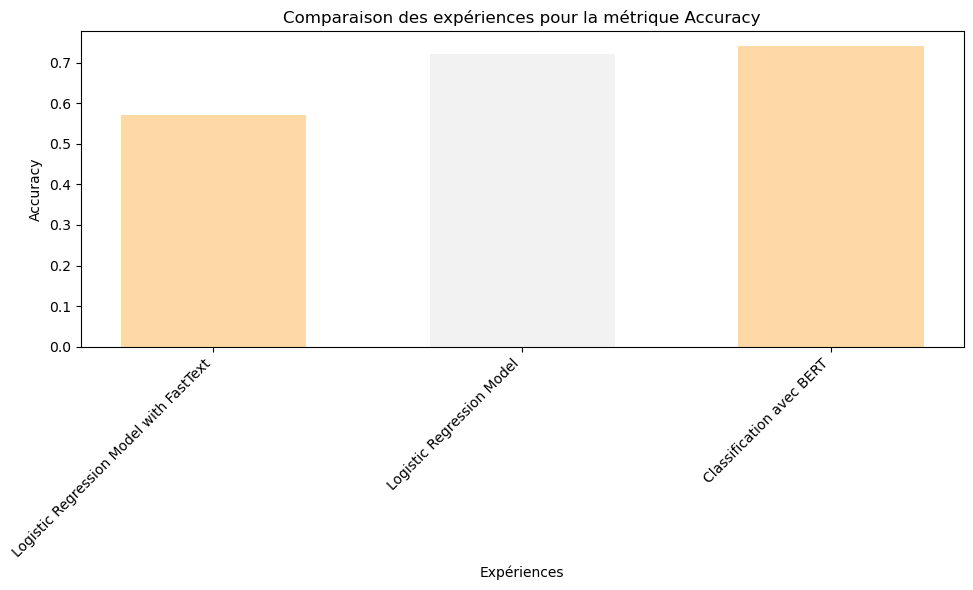

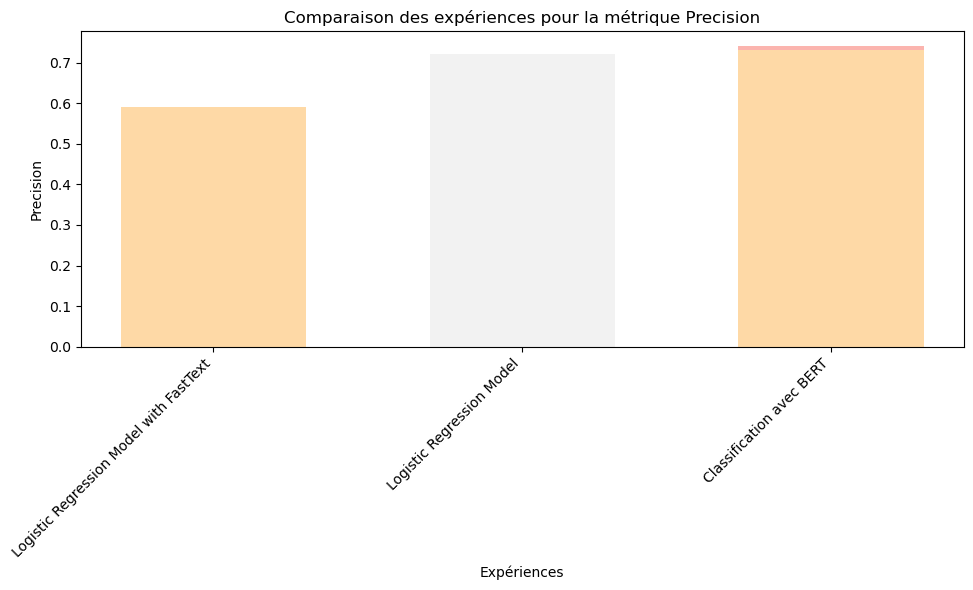

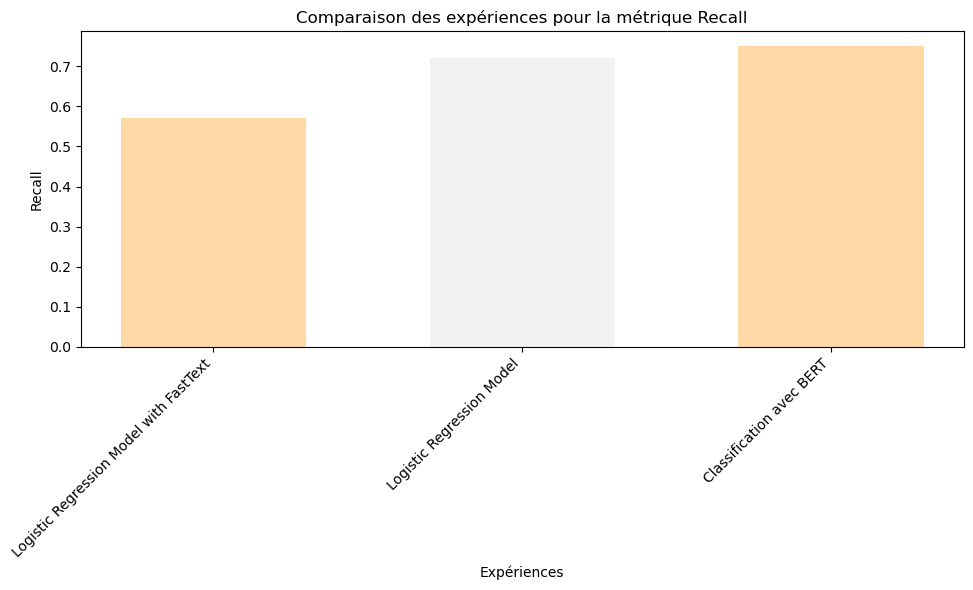

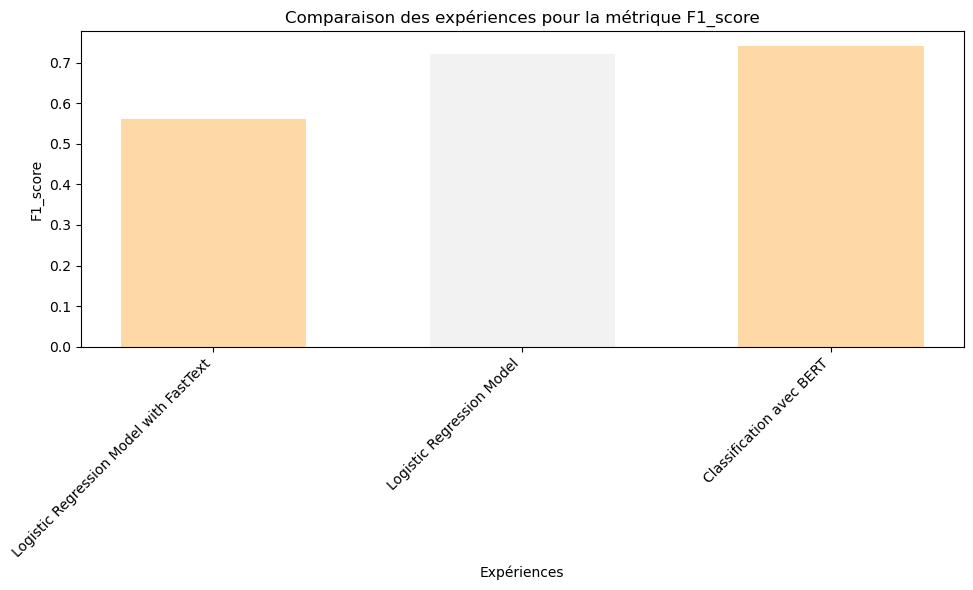

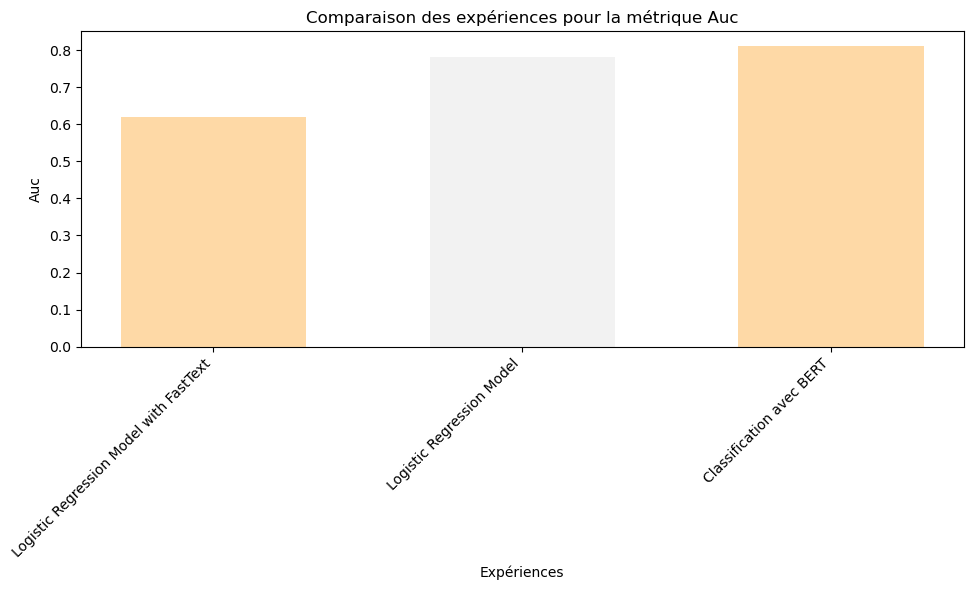

In [33]:
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Liste des noms d'expériences que nous voulons comparer, incluant "Default"
experiment_names_to_compare = [
    "Default",
    "Classification avec BERT",
    "Logistic Regression Model with FastText",
    "Régression Logistique avec GloVe",
    "LSTM avec PyTorch",
    "LSTM avec FastText",
    "LSTM avec GloVe",
]

# Obtenir les IDs des expériences à comparer
experiment_ids_to_compare = []
for experiment_name in experiment_names_to_compare:
    experiment = mlflow.get_experiment_by_name(experiment_name)
    if experiment:
        experiment_ids_to_compare.append(experiment.experiment_id)
    else:
        print(f"L'expérience '{experiment_name}' n'a pas été trouvée.")

# Les métriques à comparer
metrics_to_compare = ["accuracy", "precision", "recall", "f1_score", "auc"]

# DataFrame pour stocker les résultats de chaque run
all_data = pd.DataFrame()

# Parcourir chaque expérience par ID et récupérer les métriques de chaque run
for experiment_id in experiment_ids_to_compare:
    # Récupérer le nom de l'expérience pour identifier chaque run
    experiment_name = mlflow.get_experiment(experiment_id).name
    
    # Récupérer les runs de l'expérience
    runs = mlflow.search_runs(experiment_ids=[experiment_id])
    
    # Filtrer les colonnes nécessaires et ajouter l'expérience dans une colonne
    run_data = runs[["run_id", "tags.mlflow.runName"] + ["metrics." + metric for metric in metrics_to_compare]].copy()
    run_data.columns = ["Run ID", "Run Name"] + metrics_to_compare  # Renommer les colonnes pour plus de clarté
    
    # Si l'expérience est "Default", utiliser le nom du run pour identifier chaque expérience
    run_data["Experiment"] = run_data["Run Name"] if experiment_name == "Default" else experiment_name
    
    # Ajouter les données de cette expérience au DataFrame global
    all_data = pd.concat([all_data, run_data], ignore_index=True)

# Réduire la taille du tableau en affichant uniquement quelques lignes et arrondir les valeurs numériques pour plus de lisibilité
all_data[metrics_to_compare] = all_data[metrics_to_compare].astype(float).round(2)
all_data = all_data.head(10)  # Limitez l'affichage du tableau à 10 lignes

# Afficher le tableau comparatif
print("Tableau comparatif des performances des expériences :")
print(all_data[["Experiment"] + metrics_to_compare])

# Palette de couleurs pastel
pastel_colors = plt.cm.Pastel1(np.linspace(0, 1, len(all_data["Experiment"].unique())))

# Visualisation des performances pour chaque métrique avec noms des expériences et couleurs pastel
for metric in metrics_to_compare:
    plt.figure(figsize=(10, 6))
    
    # Générer les valeurs et labels
    values = all_data[metric]
    labels = all_data["Experiment"]
    
    # Tracer les barres avec couleur pastel et largeur augmentée
    plt.bar(labels, values, color=pastel_colors, width=0.6)
    plt.xlabel("Expériences")
    plt.ylabel(metric.capitalize())
    plt.title(f"Comparaison des expériences pour la métrique {metric.capitalize()}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
